In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta

---
The Beta Distribution
=====
***

####1. Set a = 5, b = 10 and calculate the mean and variance of the resulting beta distribution. Now spend a couple of minutes altering the values for a and b and noting the change in mean and variance

####2. Generate 100 random values from your beta distribution (the one that you defined in 1. above)

####3. Now, on the same graph, plot a histogram of the random values, and a plot of the pdf

In [3]:
a = 5
b = 10
my_beta = beta(a, b)
mean, var, skew, kurt = my_beta.stats(moments='mvsk')
print "mean: %s \nvar: %s \nskew: %s \nkurt: %s \n" % (mean, var, skew, kurt)

mean: 0.333333333333 
var: 0.0138888888889 
skew: 0.332756132323 
kurt: -0.176470588235 



In [4]:
# generate random numbers from the distribution
random_values = my_beta.rvs(size=100)
print random_values

[ 0.36908592  0.35173592  0.48255629  0.34574954  0.22905294  0.21724413
  0.23977374  0.32649762  0.33283139  0.08068366  0.13772444  0.29670016
  0.50579358  0.26627034  0.1792172   0.28025184  0.41296418  0.32859466
  0.22700251  0.34600472  0.27423123  0.28463335  0.23751977  0.32432249
  0.4650855   0.21976921  0.37505867  0.44937611  0.3779628   0.30795383
  0.2869483   0.18489046  0.3236242   0.25748096  0.10515028  0.34071699
  0.29448772  0.22858183  0.3251001   0.23429679  0.32497897  0.29689862
  0.45452423  0.37231534  0.37032873  0.35810957  0.25661339  0.36008381
  0.30676287  0.20769484  0.4234579   0.47102983  0.42970571  0.33945744
  0.62260482  0.28071525  0.15557564  0.50188191  0.31533499  0.36862085
  0.28583967  0.2473221   0.17522252  0.41770018  0.43710548  0.19636094
  0.55314409  0.39966611  0.34193166  0.35563761  0.44330553  0.41827403
  0.1298509   0.26695999  0.10387845  0.34821337  0.10552279  0.26911436
  0.30414437  0.24144269  0.26953564  0.25819442  0

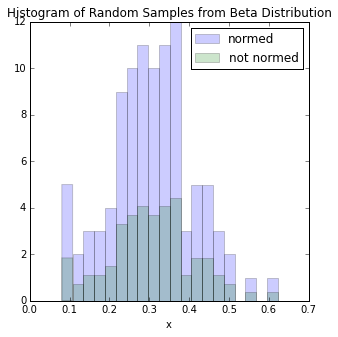

In [10]:
# what does the histogram look like for these random values?
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111)
ax.set_title("Histogram of Random Samples from Beta Distribution")
ax.set_xlabel("x")
h = ax.hist(random_values, normed=False, bins=20, alpha=0.2, label = "normed")
h2 = ax.hist(random_values, normed=True, bins=20, alpha=0.2, label = "not normed")
ax.legend(loc="upper right")

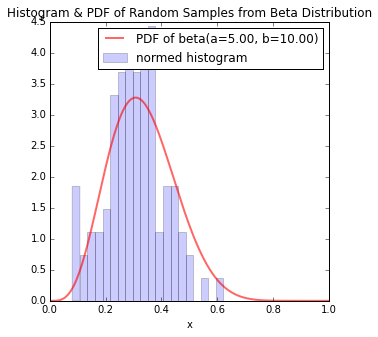

In [16]:
# what does the pdf plot look like?
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111)
ax.set_title("Histogram & PDF of Random Samples from Beta Distribution")
ax.set_xlabel("x")

x = np.linspace(0, 1, 200)
p = ax.plot(x, my_beta.pdf(x), 'r-', lw=2, alpha=0.6, label='PDF of beta(a=%0.2f, b=%0.2f)'%(a,b))
h = ax.hist(random_values, normed=True, bins=20, alpha=0.2, label="normed histogram")
ax.legend(loc = 'upper right')

---
[A Bayesian view of Amazon Resellers](http://www.johndcook.com/blog/2011/09/27/bayesian-amazon/)
=====
***

####Three Amazon resellers offer a book at essentially the same price. Here are their ratings:
- 94% positive out of 85,193 reviews
- 98% positive out of 20,785 reviews
- 99% positive out of 840 reviews
####Which reseller is likely to give the best service?

#### A simpler example:

- Reseller A has 90 positive reviews out of 100 (90% positive)
- Reseller B has two reviews, both positive. (100% positive)

####Which is better?  (better = more trustworthy)

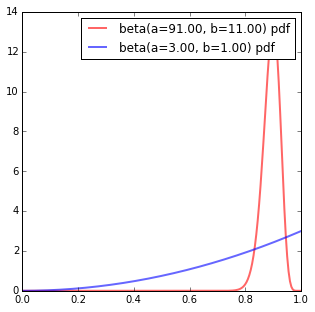

In [17]:
# Plot Beta Distribution of Beta(1,1) (the Prior)
# Plot Beta(1,1)
# Plot Beta(91,11)
# Plot Beta(3,1)
# what does pdf plot look like?
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(111)

xs = np.linspace(0, 1, 200)

resellerA_a = 90 + 1
resellerA_b = 10 + 1
resellerB_a = 2 + 1
resellerB_b = 0 + 1
pA = ax.plot(xs, beta.pdf(xs, resellerA_a, resellerA_b), 'r-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerA_a, resellerA_b))
pB = ax.plot(xs, beta.pdf(xs, resellerB_a, resellerB_b), 'b-', lw=2, alpha=0.6, 
             label='beta(a=%0.2f, b=%0.2f) pdf'%(resellerB_a, resellerB_b))

ax.legend()

In [18]:
# What is the probability that a sample from resellerA is bigger than a sample from resellerB?
# We answer this with random sampling!
def percent_better(a1, b1, a2, b2, size):
    
    ra = beta.rvs(a1, b1, size=size)
    #print ra
    rb = beta.rvs(a2, b2, size=size)
    #print rb
    #This is just a count of the number of times ra exceeds rb
    #print (ra >= rb)
    return sum(ra >= rb) / float(size)

In [19]:
pb = percent_better(resellerA_a, resellerA_b, resellerB_a, resellerB_b, size=100000)
if pb > 0.5:
    print "Reseller A is better than Reseller B by {:0.2}%".format(pb)
else:
    print "Reseller B is better than Reseller A by {:0.2}%".format(pb)

Reseller A is better than Reseller B by 0.71%


####4. Now replicate this analysis for the original problem, including plotting the 3 distributions for each reseller, finding the means and variances for the distribution of each reseller, and determining which is 'best'
####5. What do you notice?

## Back to the original Question
Three Amazon resellers offer a book at essentially the same price. Here are their ratings:
    
- Reseller A: 94% positive out of 85,193 reviews
- Reseller B: 98% positive out of 20,785 reviews
- Reseller C: 99% positive out of 840 reviews

Which reseller is likely to give the best service?

In [20]:
def calculate_ab(pos, rev):
    #get the number of successes or positive reviews
    a=(pos * rev)
    print a, "out of ", rev
    
    #get the number of failures or negative reviews
    b = (rev - a)
    print b, "out of ", rev
    
    #add the prior
    a += 1
    b += 1
    
    return a, b

In [21]:
a1, b1 = calculate_ab(0.94, 85193)
print a1, b1

80081.42 out of  85193
5111.58 out of  85193
80082.42 5112.58


In [22]:
a2, b2 = calculate_ab(0.98, 20785)
print a2, b2

20369.3 out of  20785
415.7 out of  20785
20370.3 416.7


In [23]:
a3, b3 = calculate_ab(0.99, 840)
print a3, b3

831.6 out of  840
8.4 out of  840
832.6 9.4


###Based on the percent_better function a is the best, followed by b, followed by c
###Comparison of the distribution means confirms this order

In [24]:
print a1, b1, a1 + b1
print a2, b2, a2 + b2
pbA = percent_better(a1, b1, a2, b2, size=100000)
print pbA

80082.42 5112.58 85195.0
20370.3 416.7 20787.0
0.0


In [25]:
pbB = percent_better(a1, b1, a3, b3, size=100000)

In [26]:
pbC = percent_better(a2, b2, a3, b3, size=100000)

In [27]:
pbList = [pbA, pbB, pbC]
for i in [0, 1, 2]:
    print "{:10.15f}".format(pbList[i])

0.000000000000000
0.000000000000000
0.019770000000000


In [28]:
mean, var = beta(a1, b1).stats(moments='mv')

print "mean of a is {:0.2f}".format(float(mean))
print "var of a is {:10.8f}".format(float(var))
print "\n"


mean, var = beta(a2, b2).stats(moments='mv')

print "mean of b is {:0.2f}".format(float(mean))
print "var of b {:10.8f}".format(float(var))
print "\n"

                                    
                                    
mean, var = beta(a3, b3).stats(moments='mv')
                                    
print "mean of c is {:0.2f}".format(float(mean))
print "var of c {:10.8f}".format(float(var))

mean of a is 0.94
var of a is 0.00000066


mean of b is 0.98
var of b 0.00000094


mean of c is 0.99
var of c 0.00001310


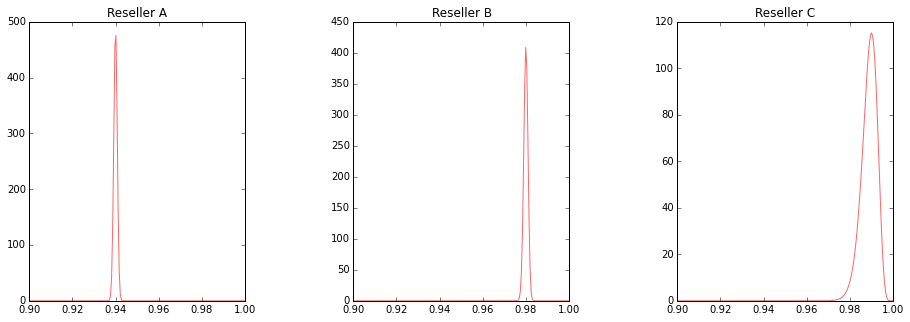

In [29]:
fig1 = plt.figure(1, figsize=(12,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


x = np.linspace(0.9, 1.0, 200)

ax1.plot(x, beta.pdf(x, a1, b1),'r-', lw=1, alpha=0.6, label='beta pdf')
ax1.set_title("Reseller A")

ax2.plot(x, beta.pdf(x, a2, b2),'r-', lw=1, alpha=0.6, label='beta pdf')
ax2.set_title("Reseller B")

ax3.plot(x, beta.pdf(x, a3, b3),'r-', lw=1, alpha=0.6, label='beta pdf')
ax3.set_title("Reseller C")

plt.subplots_adjust(left=0.00, right=1, wspace=0.5, hspace=0.5)

####Observations
1. Non of the distributions overlap
2. All have high numbers of reviews and therefore small variances
3. In such circumstances taking, or using the means of the distributions is better than using a random sampling approach